In [81]:
# https://zhuanlan.zhihu.com/p/38759896
# 导入需要的库
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
plt.style.use('fivethirtyeight')
sns.set_style({'font.sans-serif': ['simhei', 'Arial']})

In [82]:
# 检查python版本
from sys import version_info
if version_info.major != 3:
    raise Exception('请使用Python3来完成此项目')

In [83]:
# 导入数据，并进行初步观察
# Price为目标变量，共有11个特征变量
lianjia_df = pd.read_csv('lianjia.csv')
display(lianjia_df.head(n=2))

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988


In [84]:
# 检查缺失值情况
lianjia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23677 entries, 0 to 23676
Data columns (total 12 columns):
Direction     23677 non-null object
District      23677 non-null object
Elevator      15440 non-null object
Floor         23677 non-null int64
Garden        23677 non-null object
Id            23677 non-null int64
Layout        23677 non-null object
Price         23677 non-null float64
Region        23677 non-null object
Renovation    23677 non-null object
Size          23677 non-null float64
Year          23677 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


In [85]:
# 发现了数据集一共有23677条数据，其中Elevator特征有明显的缺失值

In [86]:
lianjia_df.describe()

,Floor,Id,Price,Size,Year
count,23677.000000,2.367700e+04,23677.000000,23677.000000,23677.000000
mean,12.765088,1.011024e+11,610.668319,99.149301,2001.326519
std,7.643932,5.652477e+05,411.452107,50.988838,9.001996
min,1.000000,1.010886e+11,60.000000,2.000000,1950.000000
25%,6.000000,1.011022e+11,365.000000,66.000000,1997.000000
50%,11.000000,1.011025e+11,499.000000,88.000000,2003.000000
75%,18.000000,1.011027e+11,717.000000,118.000000,2007.000000
max,57.000000,1.011028e+11,6000.000000,1019.000000,2017.000000


上面结果给出了特征值是数值的一些统计值，包括平均数，标准差，中位数，最小值，最大值，25%分位数，75%分位数。这些统计结果简单直接，对于初始了解一个特征好坏非常有用，比如我们观察到 Size 特征 的最大值为1019平米，最小值为2平米，那么我们就要思考这个在实际中是不是存在的，如果不存在没有意义，那么这个数据就是一个异常值，会严重影响模型的性能。当然，这只是初步观察，后续我们会用数据可视化来清晰的展示，并证实我们的猜测。

In [87]:
# 添加新特征:房屋均价
df = lianjia_df.copy()
df['PerPrice'] = lianjia_df['Price'] / lianjia_df['Size']

# 重新摆放列位置
columns = ['Region', 'District', 'Garden', 'Layout', 'Floor', 'Year', 'Size', 'Elevator', 'Direction', 'Renovation', 'PerPrice', 'Price']
df = pd.DataFrame(df, columns=columns)

# 重新审视数据
display(df.head(n=2))

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,NaN,东西,精装,10.40,780.0
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,无电梯,南北,精装,11.75,705.0


我们发现 Id 特征其实没有什么实际意义，所以将其移除。由于房屋单价分析起来比较方便，简单的使用总价/面积就可得到，所以增加一个新的特征 PerPrice（只用于分析，不是预测特征）。另外，特征的顺序也被调整了一下，看起来比较舒服。

# 数据可视化分析
# Region特征分析
对于区域特征，我们可以分析不同区域房价和数量的对比。

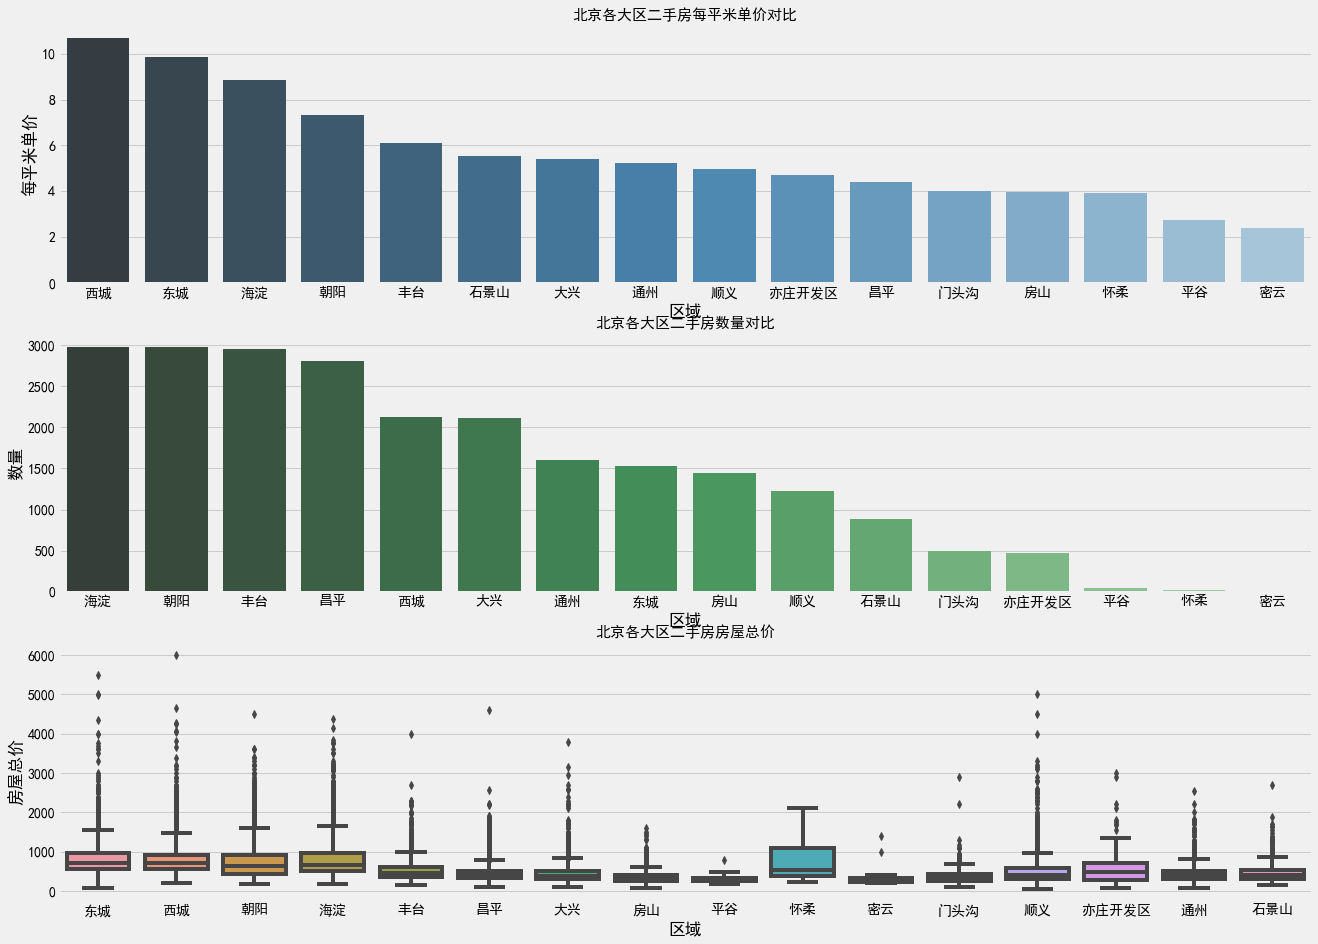

In [88]:
# 对二手房区域分组对比二手房数量和每平米的房价
# 不使用Region作为行索引，将Region作为数据
df_house_count = df.groupby('Region')['Price'].count().sort_values(ascending=False).to_frame().reset_index()
# df_house_count = df.groupby('Region')['Price'].count().sort_values(ascending=False).to_frame()
# display(df_house_count)
df_house_mean = df.groupby('Region')['PerPrice'].mean().sort_values(ascending=False).to_frame().reset_index()
# display(df_house_mean)

f, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize=(20, 15))
sns.barplot(x='Region', y='PerPrice', palette='Blues_d', data=df_house_mean, ax=ax1)
ax1.set_title('北京各大区二手房每平米单价对比', fontsize=15)
ax1.set_xlabel('区域')
ax1.set_ylabel('每平米单价')

sns.barplot(x='Region', y='Price', palette='Greens_d', data=df_house_count, ax=ax2)
ax2.set_title('北京各大区二手房数量对比', fontsize=15)
ax2.set_xlabel('区域')
ax2.set_ylabel('数量')

sns.boxplot(x='Region', y='Price', data=df, ax=ax3)
ax3.set_title('北京各大区二手房房屋总价', fontsize=15)
ax3.set_xlabel('区域')
ax3.set_ylabel('房屋总价')

plt.show()

使用了pandas的网络透视功能groupby 分组排序。区域特征可视化直接采用 seaborn完成，颜色使用调色板palette 参数，颜色渐变，越浅说明越少，反之越多。可以观察到：

二手房均价：西城区的房价最贵均价大约11万/平，因为西城在二环以里，且是热门学区房的聚集地。其次是东城大约10万/平，然后是海淀大约8.5万/平，其它均低于8万/平。

二手房房数量：从数量统计上来看，目前二手房市场上比较火热的区域。海淀区和朝阳区二手房数量最多，差不多都接近3000套，毕竟大区，需求量也大。然后是丰台区，近几年正在改造建设，有赶超之势。

二手房总价：通过箱型图看到，各大区域房屋总价中位数都都在1000万以下，且房屋总价离散值较高，西城最高达到了6000万，说明房屋价格特征不是理想的正太分布。

# Size特征分析

D:\python\Anaconda3\install\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


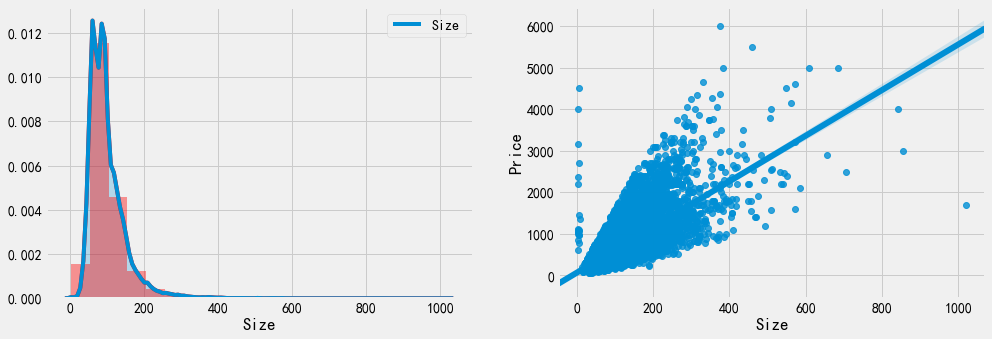

In [89]:
f, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 5))
# 房屋大小的分布情况
# 绘制柱状图, 有20个柱
sns.distplot(df['Size'], bins=20, ax=ax1, color='r')
# 绘制上面柱状图的密度曲线估计函数，
sns.kdeplot(df['Size'], shade=True, ax=ax1)

# 房屋大小与出售价格的关系
sns.regplot(x='Size', y='Price', data=df, ax=ax2)

plt.show()

Size 分布：
通过 distplot 和 kdeplot 绘制柱状图观察 Size 特征的分布情况，属于长尾类型的分布，这说明了有很多面积很大且超出正常范围的二手房。

Size 与 Price 的关系：
通过 regplot 绘制了 Size 和 Price 之间的散点图，发现 Size 特征基本与Price呈现线性关系，符合基本常识，面积越大，价格越高。但是有两组明显的异常点：1. 面积不到10平米，但是价格超出10000万；2. 一个点面积超过了1000平米，价格很低，需要查看是什么情况。

In [90]:
df.loc[df['Size'] < 10]

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
1168,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,毛坯,240.97平米,南北,216.000000,1080.0
1458,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,毛坯,242.78平米,南北,220.000000,1100.0
1797,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,精装,242.96平米,南北,196.000000,980.0
2268,顺义,顺义其它,龙湖好望山,叠拼别墅,4,2014,4.0,精装,295.88平米,南北,250.000000,1000.0
2274,顺义,顺义其它,鹭峯国际,叠拼别墅,4,2014,5.0,精装,295.01平米,南北,290.000000,1450.0
2276,顺义,顺义其它,龙湖好望山,叠拼别墅,3,2014,4.0,毛坯,292.31平米,南北,215.000000,860.0
2432,顺义,顺义其它,龙湖好望山,叠拼别墅,5,2013,6.0,精装,294.42平米,南北,163.333333,980.0
4078,大兴,西红门,鸿坤林语墅,叠拼别墅,3,2015,4.0,精装,427.5平米,南北,787.500000,3150.0
4079,大兴,西红门,鸿坤林语墅,叠拼别墅,4,2015,4.0,精装,361.8平米,南北,595.000000,2380.0
4761,大兴,西红门,鸿坤林语墅,叠拼别墅,3,2015,5.0,精装,386.83平米,南北,540.000000,2700.0


经过查看发现这组数据是别墅，出现异常的原因是由于别墅结构比较特殊（无朝向无电梯），字段定义与二手商品房不太一样导致爬虫爬取数据错位。也因别墅类型二手房不在我们的考虑范围之内，故将其移除再次观察Size分布和Price关系。

In [91]:
df.loc[df['Size'] > 1000]

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
8754,通州,通州其它,新华联科技大厦,1房间0卫,8,2009,1019.0,有电梯,南,简装,1.668302,1700.0


经观察这个异常点不是普通的民用二手房，很可能是商用房，所以才有1房间0厅确有如此大超过1000平米的面积，这里选择移除。

D:\python\Anaconda3\install\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


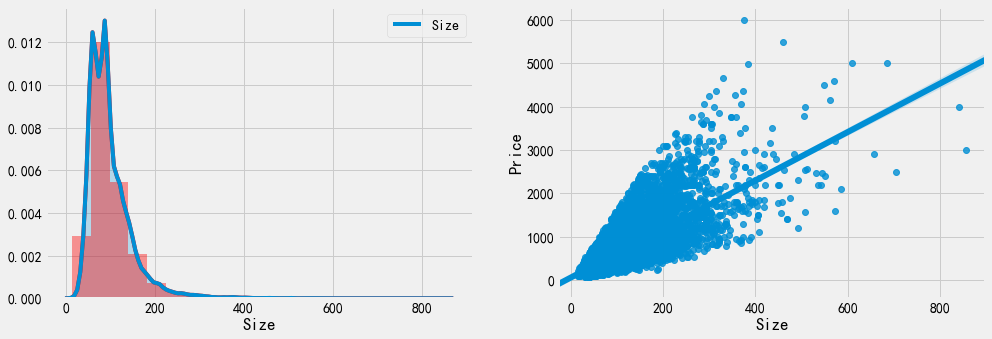

In [92]:
df = df[(df['Layout'] != '叠拼别墅') & (df['Size'] < 1000)]

f, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 5))
# 房屋大小的分布情况
# 绘制柱状图, 有20个柱
sns.distplot(df['Size'], bins=20, ax=ax1, color='r')
# 绘制上面柱状图的密度曲线估计函数，
sns.kdeplot(df['Size'], shade=True, ax=ax1)

# 房屋大小与出售价格的关系
sns.regplot(x='Size', y='Price', data=df, ax=ax2)

plt.show()

重新进行可视化发现就没有明显的异常点了。

# Layout特征分析

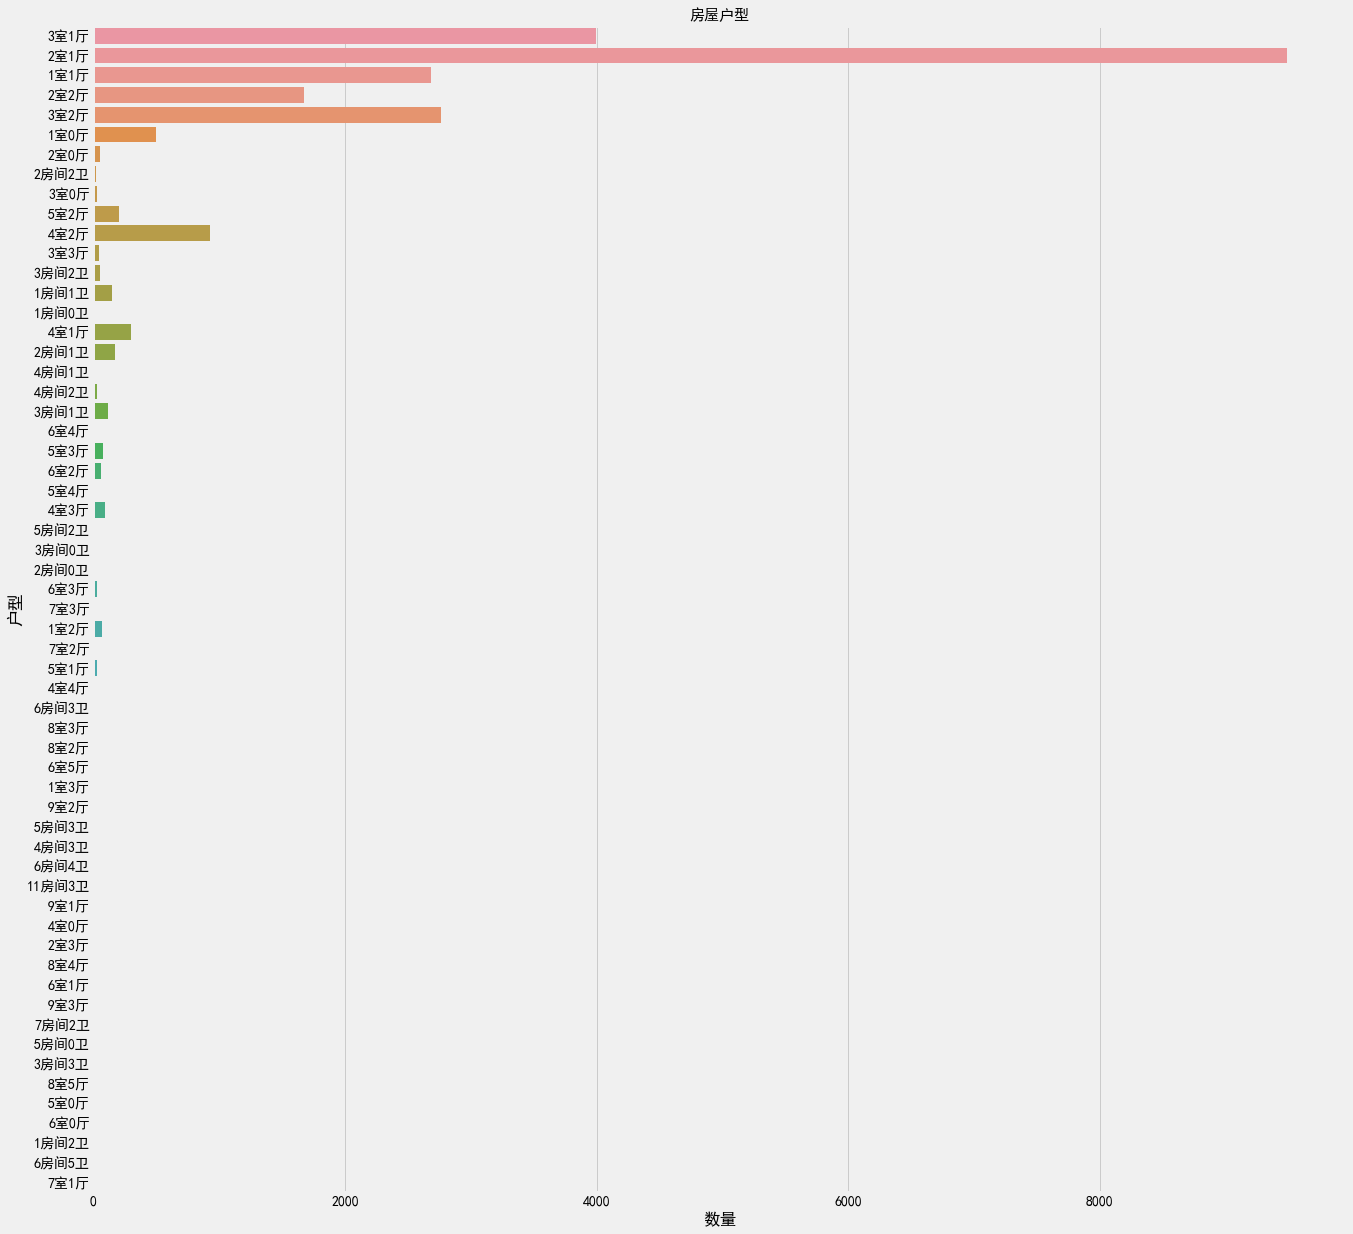

In [93]:
f, ax1 = plt.subplots(figsize=(20, 20))
sns.countplot(y='Layout', data=df, ax=ax1)
ax1.set_title('房屋户型', fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
plt.show()

这个特征真是不看不知道，各种厅室组合搭配，竟然还有9室3厅，4室0厅等奇怪的结构。其中，2室一厅占绝大部分，其次是3室一厅，2室2厅，3室两厅。但是仔细观察特征分类下有很多不规则的命名，比如2室一厅与2房间1卫，还有别墅，没有统一的叫法。这样的特征肯定是不能作为机器学习模型的数据输入的，需要使用特征工程进行相应的处理。

# Renovation 特征分析

In [94]:
df['Renovation'].value_counts()

精装    11345
简装     8496
其他     3239
毛坯      576
Name: Renovation, dtype: int64

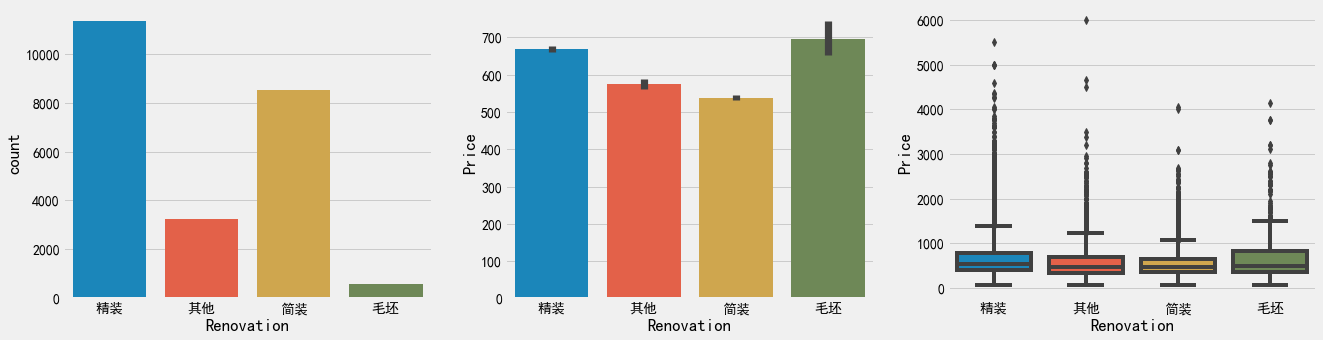

In [95]:
# 画幅设置
f, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot(df['Renovation'], ax=ax1)
sns.barplot(x='Renovation', y='Price', data=df, ax=ax2)
sns.boxplot(x='Renovation', y='Price', data=df, ax=ax3)
plt.show()

观察到，精装修的二手房数量最多，简装其次，也是我们平日常见的。而对于价格来说，毛坯类型却是最高，其次是精装修。

# Elevator 特征分析
初探数据的时候，我们发现 Elevator 特征是有大量缺失值的，这对于我们是十分不利的，首先我们先看看有多少缺失值：

In [96]:
misn = len(df.loc[(df['Elevator'].isnull()), 'Elevator'])
print('Elevator缺失值数量为:' + str(misn))

Elevator缺失值数量为:8237


这么多的缺失值怎么办呢？这个需要根据实际情况考虑，常用的方法有平均值/中位数填补法，直接移除，或者根据其他特征建模预测等。

这里我们考虑填补法，但是有无电梯不是数值，不存在平均值和中位数，怎么填补呢？这里给大家提供一种思路：就是根据楼层 Floor 来判断有无电梯，一般的楼层大于6的都有电梯，而小于等于6层的一般都没有电梯。有了这个标准，那么剩下的就简单了。

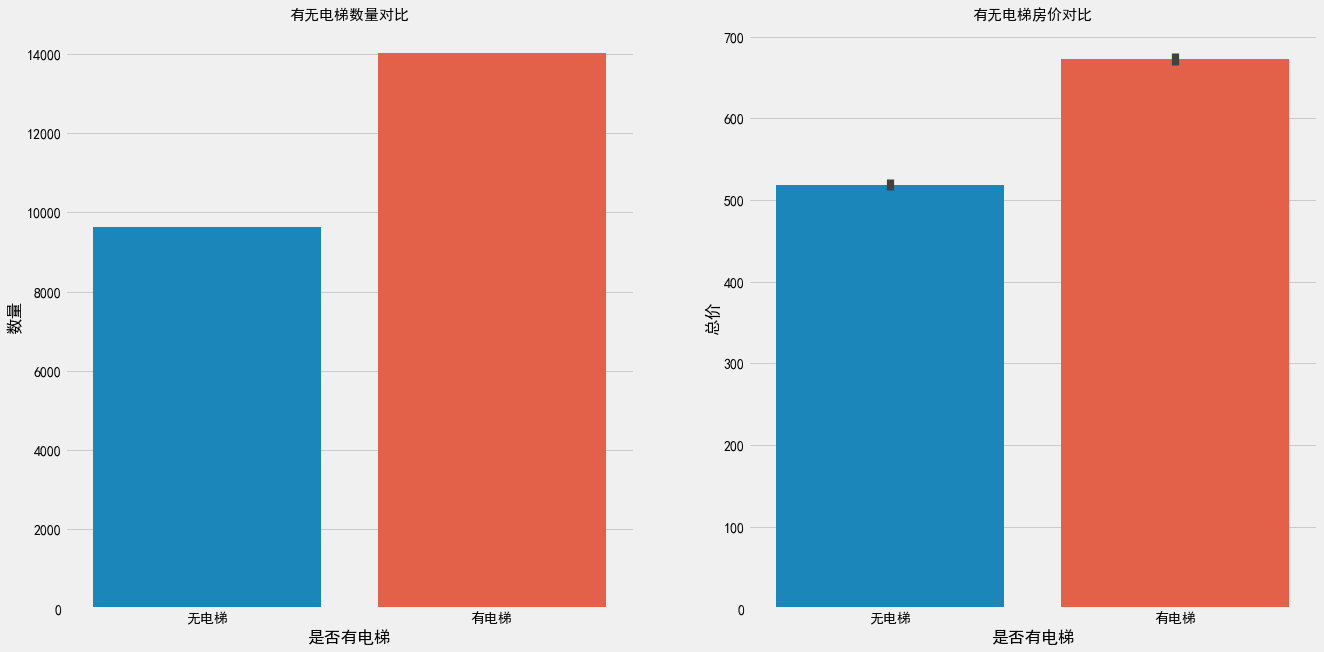

In [97]:
# 由于存在个别类型错误，如简装和精装，特征值错位，故需要移除
df['Elevator'] = df.loc[(df['Elevator'] == '有电梯') | (df['Elevator'] == '无电梯'), 'Elevator']

# 填补Elevator缺失值
df.loc[(df['Floor'] > 6) & (df['Elevator'].isnull()), 'Elevator'] = '有电梯'
df.loc[(df['Floor'] <= 6) & (df['Elevator'].isnull()), 'Elevator'] = '无电梯'

f, [ax1,ax2] = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(df['Elevator'], ax=ax1)
ax1.set_title('有无电梯数量对比', fontsize=15)
ax1.set_xlabel('是否有电梯')
ax1.set_ylabel('数量')

sns.barplot(x='Elevator', y='Price', data=df, ax=ax2)
ax2.set_title('有无电梯房价对比',fontsize=15)
ax2.set_xlabel('是否有电梯')
ax2.set_ylabel('总价')
plt.show()

结果观察到，有电梯的二手房数量居多一些，毕竟高层土地利用率比较高，适合北京庞大的人群需要，而高层就需要电梯。相应的，有电梯二手房房价较高，因为电梯前期装修费和后期维护费包含内了（但这个价格比较只是一个平均的概念，比如无电梯的6层豪华小区当然价格更高了）。

# Year 特征分析

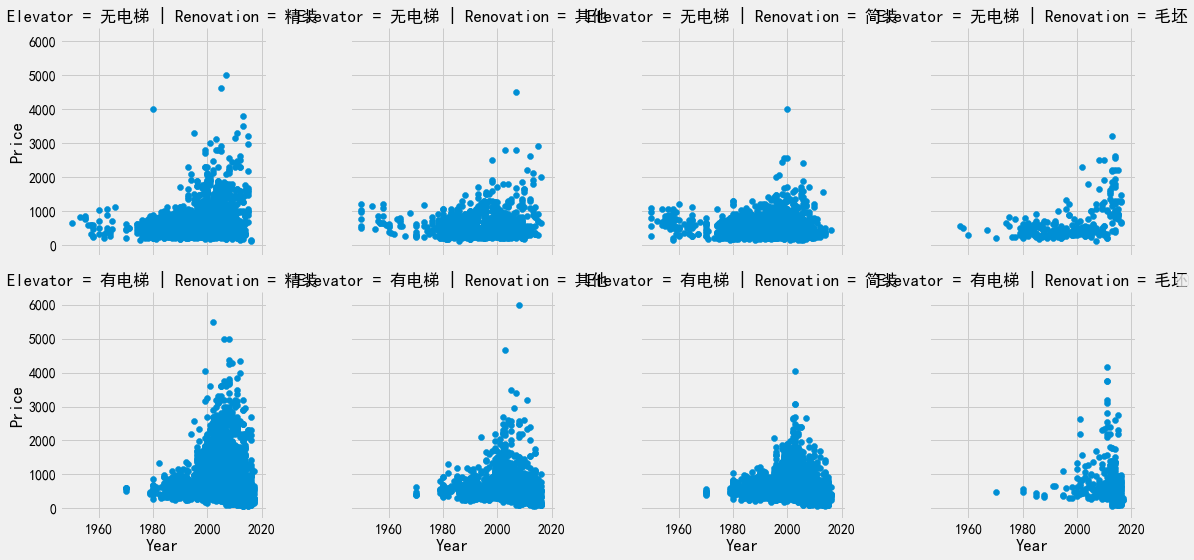

In [98]:
grid = sns.FacetGrid(df, row='Elevator', col='Renovation', palette='seismic',size=4)
grid.map(plt.scatter, 'Year', 'Price')
grid.add_legend()

在Renovation和Elevator的分类条件下，使用 FaceGrid 分析 Year 特征，观察结果如下：

整个二手房房价趋势是随着时间增长而增长的；
2000年以后建造的二手房房价相较于2000年以前有很明显的价格上涨；
1980年之前几乎不存在有电梯二手房数据，说明1980年之前还没有大面积安装电梯；
1980年之前无电梯二手房中，简装二手房占绝大多数，精装反而很少；

# Floor 特征分析

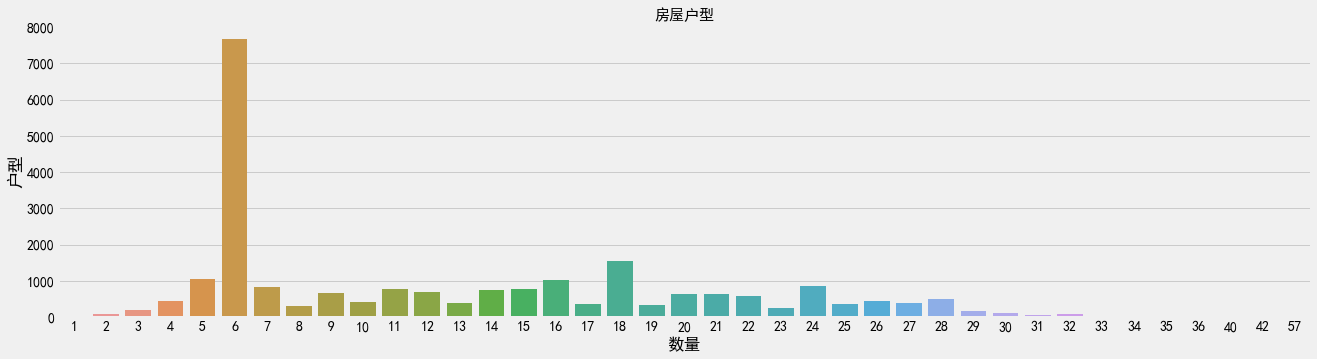

In [99]:
f, ax1= plt.subplots(figsize=(20,5))
sns.countplot(x='Floor', data=df, ax=ax1)
ax1.set_title('房屋户型',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
plt.show()

可以看到，6层二手房数量最多，但是单独的楼层特征没有什么意义，因为每个小区住房的总楼层数都不一样，我们需要知道楼层的相对意义。另外，楼层与文化也有很重要联系，比如中国文化七上八下，七层可能受欢迎，房价也贵，而一般也不会有4层或18层。当然，正常情况下中间楼层是比较受欢迎的，价格也高，底层和顶层受欢迎度较低，价格也相对较低。所以楼层是一个非常复杂的特征，对房价影响也比较大。

# 总结

本次分享旨在让大家了解如何用Python做一个简单的数据分析，对于刚刚接触数据分析的朋友无疑是一个很好的练习。不过，这个分析还存在很多问题需要解决，比如：

解决爬虫获取的数据源准确度问题；
需要爬取或者寻找更多好的售房特征；
需要做更多地特征工程工作，比如数据清洗，特征选择和筛选；
使用统计模型建立回归模型进行价格预测；

https://zhuanlan.zhihu.com/p/39592431
上一篇https://zhuanlan.zhihu.com/p/38759896 和大家分享了一个入门数据分析的一个小项目 北京二手房房价分析。
本篇将继续上一篇数据分析之后进行数据挖掘建模预测，这两部分构成了一个简单的完整项目。
结合两篇文章通过数据分析和挖掘的方法可以达到二手房屋价格预测的效果。
下面从特征工程开始讲述。

# 特征工程

In [100]:
# 移除结构类型异常值和房屋大小异常值
df = df[(df['Layout'] != '叠拼别墅') & (df['Size'] < 1000)]

In [101]:
# 去掉错误数据“南北”，因为爬虫过程中一些位置信息为空，导致“Direction”的特征出现在这里，需要清除或替换
df['Renovation'] = df.loc[(df['Renovation'] != '南北'), 'Renovation']

In [102]:
# 由于存在个别类型错误，如简装和精装，特征值错位，故需要移除
df['Elevator'] = df.loc[(df['Elevator'] == '有电梯') | (df['Elevator'] == '无电梯'), 'Elevator']

In [103]:
# 填补Elevator缺失值
df.loc[(df['Floor'] > 6) & (df['Elevator'].isnull()), 'Elevator'] = '有电梯'
df.loc[(df['Floor'] <= 6) & (df['Elevator'].isnull()), 'Elevator'] = '无电梯'

# Layout特征的处理
大家也都看到了，特征值并不是像想象中的那么理想。有两种格式的数据，一种是"xx室xx厅"，另一种是"xx房间xx卫"，但是绝大多数都是xx室xx厅的数据。而对于像"11房间3卫"或者"5房间0卫"这些的Layout明显不是民住的二手房（不在我们的考虑范围之内），因此最后决定将所有"xx房间xx卫"格式的数据都移除掉，只保留"xx室xx厅"的数据。

将"室"和"厅"都提取出来，单独作为两个新特征，这样效果可能更好

In [104]:
# 只考虑“室”和“厅”，将其他少数“房间”和“卫”移除
df = df.loc[df['Layout'].str.extract('^\d(.*?)\d.*?') == '室']

# 提取“室”和“厅”创建新特征
df['Layout_room_num'] = df['Layout'].str.extract('(^\d).*', expand=False).astype('int64')
df['Layout_hall_num'] = df['Layout'].str.extract('^\d.*?(\d).*', expand=False).astype('int64')
display(df.head(n=2))

D:\python\Anaconda3\install\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price,Layout_room_num,Layout_hall_num
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,无电梯,东西,精装,10.40,780.0,3,1
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,无电梯,南北,精装,11.75,705.0,2,1


我们还有一个 Year 特征，为建房的年限时间。年限种类很多，分布在1950和2018之间，如果每个不同的 Year 值都作为特征值，我们并不能找出 Year 对 Price 有什么影响，因为年限划分的太细了。因此，我们只有将连续数值型特征 Year 离散化，做分箱处理。
使用了pandas的 qcut 采用中位数进行分割，分割数为8等份。

In [105]:
# 按中位数对“Year”特征进行分箱
df['Year'] = pd.qcut(df['Year'], 8).astype('object')
df['Year'].value_counts()

(2000.0, 2003.0]      3705
(2004.0, 2007.0]      3369
(1990.0, 1997.0]      3110
(1949.999, 1990.0]    3024
(1997.0, 2000.0]      2829
(2010.0, 2017.0]      2687
(2007.0, 2010.0]      2571
(2003.0, 2004.0]      1757
Name: Year, dtype: int64

像"西南西北北"或者"东东南南"这样的朝向是不符合常识的（反正我是理解不了）。因此，我们需要将这些凌乱的数据进行处理，具体实现方式是博主自己写了一个函数 direct_func，主要思想就是将各种重复但顺序不一样的特征值合并，比如"西南北"和"南西北"，并将不合理的一些值移除，如"西南西北北"等。

In [106]:
# 将字符串strDirect按顺序去重
def direct_func(strDirect):
    uniqueDirect = list(set(strDirect))
    uniqueDirect.sort(key=strDirect.index)
    strunique = ''.join(uniqueDirect)
    
    if 1 == len(strunique):
        return strunique;
    
    if '东' in strunique and '西' in strunique and 2 == len(strunique):
        return '东西'
    elif '东' in strunique and '南' in strunique and 2 == len(strunique):
        return '东南'
    elif '东' in strunique and '北' in strunique and 2 == len(strunique):
        return '东北'
    elif '西' in strunique and '南' in strunique and 2 == len(strunique):
        return '西南'
    elif '西' in strunique and '北' in strunique and 2 == len(strunique):
        return '西北'
    elif '南' in strunique and '北' in strunique and 2 == len(strunique):
        return '南北'
    
    if 3 == len(strunique) and '东' in strunique and '西' in strunique and '南' in strunique:
        return '东西南'
    elif 3 == len(strunique) and '东' in strunique and '西' in strunique and '北' in strunique:
        return '东西北'
    elif 3 == len(strunique) and '东' in strunique and '南' in strunique and '北' in strunique:
        return '东南北'
    elif 3 == len(strunique) and '西' in strunique and '南' in strunique and '北' in strunique:
        return '西南北'
    
    if 4 == len(strunique):
        return '东西南北'

# un = direct_func('东东南南北北')
# print(un)
# s = "abcdabcd1234uiopppl"
# print(s.index)
# ss = list(set(s))
# ss.sort(key=s.index)
# print(ss)

In [107]:
# 对“Direction”特征
d_list_one = ['东','西','南','北']
d_list_two = ['东西','东南','东北','西南','西北','南北']
d_list_three = ['东西南','东西北','东南北','西南北']
d_list_four = ['东西南北']
df['Direction'] = df['Direction'].apply(direct_func)
df = df.loc[(df['Direction'] != 'no') & (df['Direction'] != 'nan')]

处理完结果如下，所有的内容相同而顺序不同的朝向都合并了，异常朝向也被移除了。

In [109]:
df['Direction'].value_counts()

南北      11368
南        2726
东西       1388
东南       1337
西南       1270
东         843
西         802
西北        738
东北        649
西南北       512
东南北       498
北         484
东西南       157
东西北       154
东西南北      126
Name: Direction, dtype: int64

# 创建新特征
有时候仅靠已有的一些特征是不够的，需要根据对业务的理解，定义一些的新特征，然后尝试这些新特征对模型的影响，在实战中会经常使用这种方法。

这里尝试将"室"与"厅"的数量相加作为一个总数量特征，然后将房屋大小Size与总数量的比值作为一个新特征，可理解为 "每个房间的平均面积大小"。当然，新特征不是固定的，可根据自己的理解来灵活的定义。

In [111]:
# 根据已有特征创建新特征
df['Layout_total_num'] = df['Layout_room_num'] + df['Layout_hall_num']
df['Size_room_ratio'] = df['Size'] / df['Layout_total_num']

# 删除无用特征
df = df.drop(['Layout', 'PerPrice', 'Garden'], axis=1)

In [112]:
display(df.head(n=2))

,Region,District,Floor,Year,Size,Elevator,Direction,Renovation,Price,Layout_room_num,Layout_hall_num,Layout_total_num,Size_room_ratio
0,东城,灯市口,6,"(1949.999, 1990.0]",75.0,无电梯,东西,精装,780.0,3,1,4,18.75
1,东城,东单,6,"(1949.999, 1990.0]",60.0,无电梯,南北,精装,705.0,2,1,3,20.00


# One-hot coding

这部分是 One-hot 独热编码，因为像 Region，Year（离散分箱后），Direction，Renovation，Elevator等特征都是定类的非数值型类型，而作为模型的输入我们需要将这些非数值量化。

In [114]:
# 这里并不是简单的对df进行编码，这里和原文有区别，原文的作者自己封装了一个函数实现定类数据的自动量化处理
# 从这里数据就和原文不一样了，所以下面的数据建模预测就不做了。
df1= pd.get_dummies(df)
display(df1.head(n=2))

,Floor,Size,Price,Layout_room_num,Layout_hall_num,Layout_total_num,Size_room_ratio,Region_东城,Region_丰台,Region_亦庄开发区,...,Direction_南,Direction_南北,Direction_西,Direction_西北,Direction_西南,Direction_西南北,Renovation_其他,Renovation_毛坯,Renovation_简装,Renovation_精装
0,6,75.0,780.0,3,1,4,18.75,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,6,60.0,705.0,2,1,3,20.00,1,0,0,...,0,1,0,0,0,0,0,0,0,1


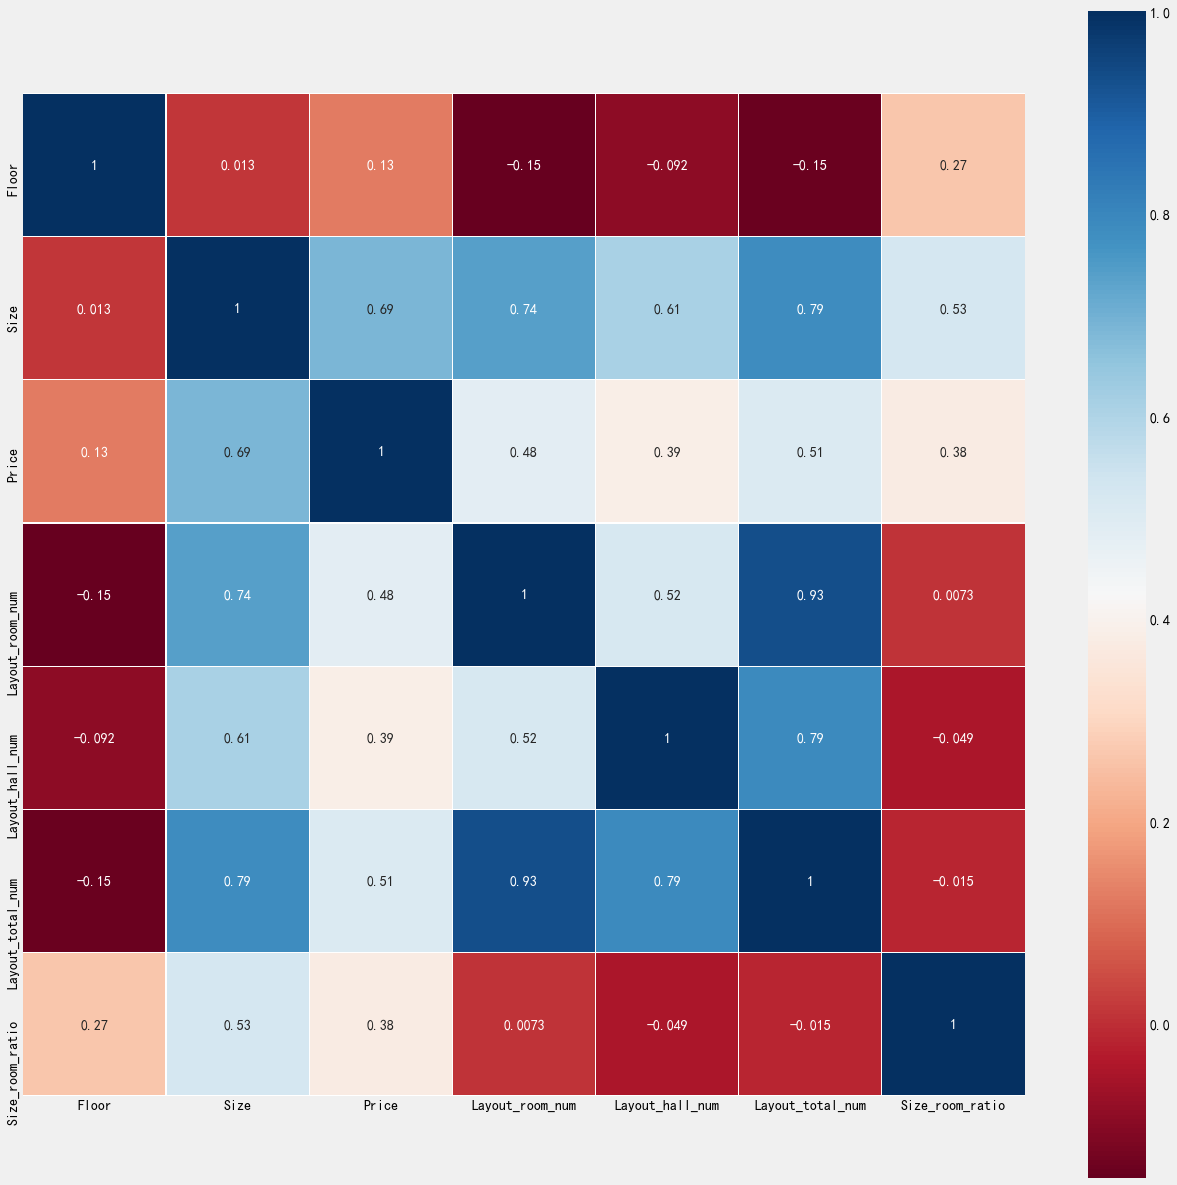

In [115]:
# data_corr
colormap = plt.cm.RdBu
plt.figure(figsize=(20, 20))
# plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

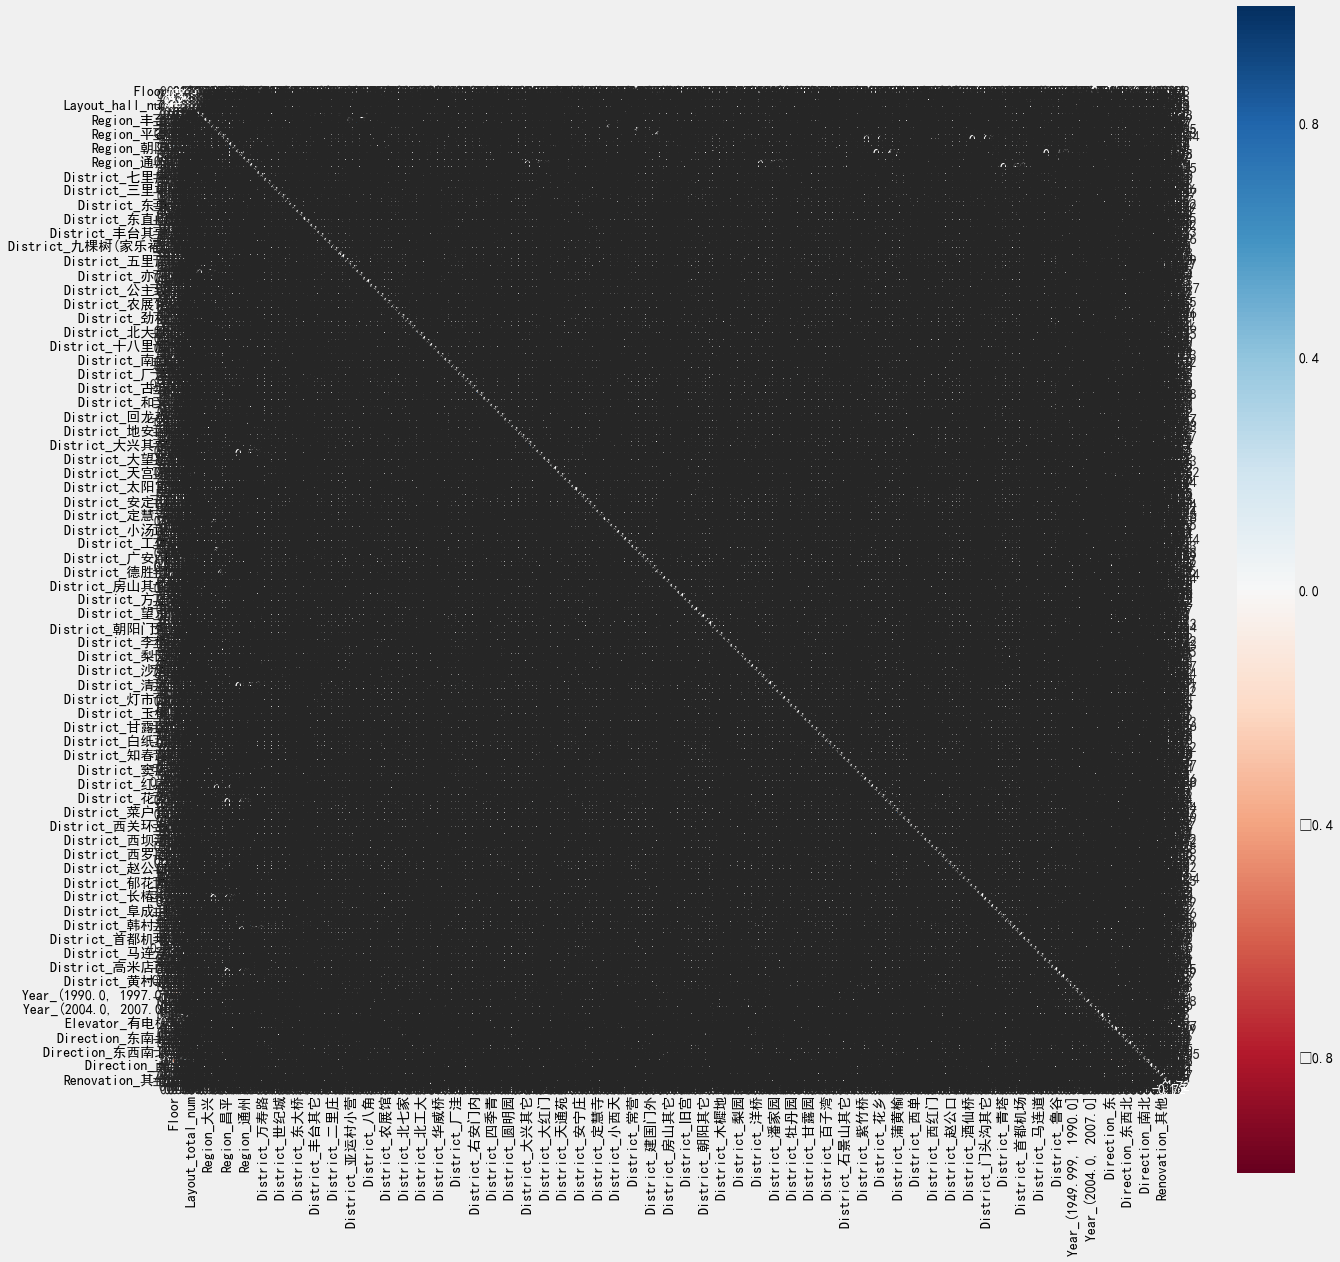

In [116]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20, 20))
# plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df1.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

出现的这样的情况是因为数据不正确，上面对数据的非数值类型的量化有问题，不应该简单的使用get_dummies()进行量化。
原文中作者是自己实现了一个函数，我没有找到相应的代码，所以数据就不一样了，到现在就不继续往下做了。
在这里说一下原文中作者是怎样做数据建模预测的

为了方便理解，建模上做了一些精简，模型策略方法如下：
使用Cart决策树的回归模型对二手房房价进行分析预测。
使用交叉验证方法充分利用数据集进行训练，避免数据划分不均匀的影响
使用GridSearchCV方法优化模型参数。
使用R2评分方法对模型预测评分。